In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets

print('python version:', sys.version.split('\n')[0])
for m in [tf, np, pd, mpl]:
    print(m.__name__, 'version:', m.__version__)

python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
tensorflow version: 2.3.1
numpy version: 1.18.5
pandas version: 1.1.3
matplotlib version: 3.3.2


out = 𝑅e𝐿𝑈{𝑅e𝐿𝑈{𝑅e𝐿𝑈{X@W1+b1}@W2+b2}@W3+b3}

In [10]:
def load_data():
    (x, y), (x_val, y_val) = datasets.mnist.load_data()
    
    x = 2*tf.convert_to_tensor(x, dtype=tf.float32)/255.-1
    y = tf.convert_to_tensor(y, dtype=tf.int32)
    
    x = tf.reshape(x, (-1, 28*28))
    y = tf.one_hot(y, depth=10)
    
    train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
    train_dataset = train_dataset.batch(200)
    
    return train_dataset

In [6]:
def init_paramaters():
    
    w1 = tf.Variable(tf.random.normal([784, 256], stddev=0.1))
    b1 = tf.Variable(tf.zeros(256))
    
    w2 = tf.Variable(tf.random.normal([256, 128], stddev=0.1))
    b2 = tf.Variable(tf.zeros(128))
    
    w3 = tf.Variable(tf.random.normal([128, 10], stddev=0.1))
    b3 = tf.Variable(tf.zeros(10))
    
    return w1,b1,w2,b2,w3,b3

In [7]:
def train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001):
    for step, (x, y) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            
            # 1st layers
            h1 = x@w1 + b1
            h1 = tf.nn.relu(h1)
            
            # 2nd layers
            h2 = h1@w2 + b2
            h2 = tf.nn.relu(h2)
            
            # 3rd layers
            out = h2@w3 + b3
            
            loss = tf.square(out - y)
            loss = tf.reduce_mean(loss)
            
            grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])
        
        if step % 100 == 0:
            print(epoch, step, 'loss:', loss.numpy())
    
    return loss.numpy()

In [8]:
def train(epochs):
    
    total_loss = []
    x = []
    data = load_data()
    w1,b1,w2,b2,w3,b3 = init_paramaters()
    
    for i in range(epochs):
        loss = train_epoch(i,data,w1,b1,w2,b2,w3,b3)
        total_loss.append(loss)
        x.append(i)
    
    plt.plot(x, total_loss, color='blue', marker='s')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.show()   

0 0 loss: 5.826967
0 100 loss: 0.72572815
0 200 loss: 0.48018765
1 0 loss: 0.40342662
1 100 loss: 0.3623934
1 200 loss: 0.297965
2 0 loss: 0.26698408
2 100 loss: 0.26406872
2 200 loss: 0.22897145
3 0 loss: 0.20793077
3 100 loss: 0.21776897
3 200 loss: 0.1895094
4 0 loss: 0.1757749
4 100 loss: 0.1880257
4 200 loss: 0.16384806
5 0 loss: 0.15467396
5 100 loss: 0.16780387
5 200 loss: 0.14627676
6 0 loss: 0.13978538
6 100 loss: 0.15302053
6 200 loss: 0.13344921
7 0 loss: 0.12844223
7 100 loss: 0.14149432
7 200 loss: 0.123551086
8 0 loss: 0.1193038
8 100 loss: 0.13233237
8 200 loss: 0.115653105
9 0 loss: 0.11207275
9 100 loss: 0.12487799
9 200 loss: 0.10890362
10 0 loss: 0.10621767
10 100 loss: 0.11849195
10 200 loss: 0.10319255
11 0 loss: 0.10128218
11 100 loss: 0.11310055
11 200 loss: 0.0984069
12 0 loss: 0.097056
12 100 loss: 0.10845902
12 200 loss: 0.09432308
13 0 loss: 0.09340698
13 100 loss: 0.10439222
13 200 loss: 0.09085028
14 0 loss: 0.09023886
14 100 loss: 0.100851156
14 200 loss: 

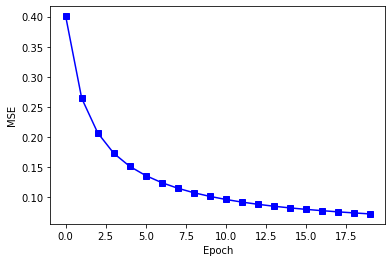

In [12]:
train(20)